## Dataset Preparation (Hand-Crafted Features)

In [ ]:
# Import OS
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Import PyTorch
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

# Import Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import Random
import random

# Import Numpy
import numpy as np

# Import Matplotlib
import matplotlib.pyplot as plt

# Import CV2
import cv2

# Import Skimage
from skimage import color
from skimage.feature import SIFT, ORB, fisher_vector, learn_gmm

# Import Sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster  import KMeans
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Check Verisions
print(f"PyTorch version: {torch.__version__} \ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.2+cpu 
torchvision version: 0.16.2+cpu


### Loading the CIFAR-100 Dataset

In [ ]:
# Load the CIFAR-100 dataset, Train
cifar100_train = datasets.CIFAR100(
    root='./data',
    train=True,
    transform=None,
    target_transform=None,
    download=True
)

# Load the CIFAR-100 dataset, Test
cifar100_test = datasets.CIFAR100(
    root='./data',
    train=False,
    transform=None,
    target_transform=None,
    download=True
)

Files already downloaded and verified
Files already downloaded and verified


### Previewing the Training Data

In [ ]:
cifar100_train

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: ./data
    Split: Train

In [ ]:
len(cifar100_train.classes)

100

In [ ]:
cifar100_train.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [ ]:
cifar100_train[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 19)

In [ ]:
image, label = cifar100_train[0]

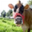

In [ ]:
image

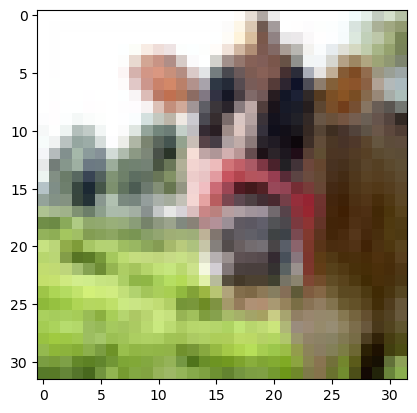

In [ ]:
# Display sample image
plt.imshow(image)
plt.show()

In [ ]:
label

19

In [ ]:
cifar100_test.classes[label]

'cattle'

### Previewing the Testing Data

In [ ]:
cifar100_test

Dataset CIFAR100
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

In [ ]:
len(cifar100_test.classes)

100

In [ ]:
cifar100_test.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [ ]:
cifar100_test[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 49)

In [ ]:
image, label = cifar100_test[0]

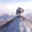

In [ ]:
image

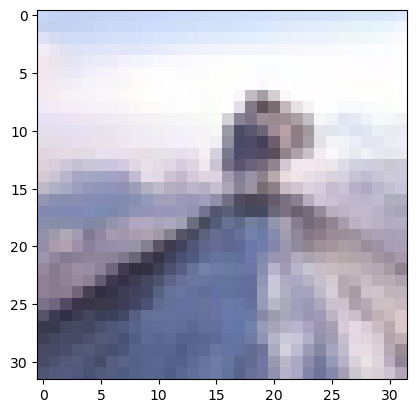

In [ ]:
# Display sample image
plt.imshow(image)
plt.show()

In [ ]:
label

49

In [ ]:
cifar100_test.classes[label]

'mountain'

### Randomly choosing a selected number of classes (n =15)

In [ ]:
def select_classes(num_classes):
     # Set the random seed for reproducibility
    random.seed(42)

    # Randomly select `num_classes` from the CIFAR-100 dataset
    selected_classes = random.sample(range(100), num_classes)

    # Filter training data
    train_images = []
    train_labels = []
    for idx, (image, label) in enumerate(cifar100_train):
        if label in selected_classes:
            image = np.array(image)
            train_images.append(image)
            train_labels.append(label)

    # Filter testing data
    test_images = []
    test_labels = []
    for idx, (image, label) in enumerate(cifar100_test):
        if label in selected_classes:
            image = np.array(image)
            test_images.append(image)
            test_labels.append(label)

    return train_images, train_labels, test_images, test_labels, selected_classes

# Select 15 classes from CIFAR-100
num_classes = 15
train_images, train_labels, test_images, test_labels, selected_classes = select_classes(num_classes)

print("Selected Classes:", selected_classes)
print("Number of Training Samples:", len(train_images))
print("Number of Testing Samples:", len(test_images))

Selected Classes: [81, 14, 3, 94, 35, 31, 28, 17, 13, 86, 69, 11, 75, 54, 4]
Number of Training Samples: 7500
Number of Testing Samples: 1500


In [ ]:
image, label = train_images[0], train_labels[0]
image, label

(array([[[124, 194, 221],
         [131, 202, 228],
         [135, 206, 228],
         ...,
         [149, 225, 236],
         [143, 220, 234],
         [136, 213, 230]],
 
        [[121, 194, 220],
         [128, 201, 225],
         [134, 206, 228],
         ...,
         [151, 224, 234],
         [146, 222, 234],
         [142, 217, 232]],
 
        [[122, 197, 223],
         [129, 204, 228],
         [136, 208, 229],
         ...,
         [156, 228, 236],
         [153, 226, 237],
         [148, 221, 235]],
 
        ...,
 
        [[129,  42,  59],
         [147,  17,  38],
         [151,  16,  30],
         ...,
         [234, 231, 225],
         [238, 240, 233],
         [224, 197, 201]],
 
        [[150,  21,  40],
         [152,  17,  33],
         [156,  25,  36],
         ...,
         [227, 225, 221],
         [231, 241, 233],
         [231, 236, 230]],
 
        [[147,  12,  25],
         [146,  11,  23],
         [156,  15,  29],
         ...,
         [230, 237, 232],
  

In [ ]:
image.shape

(32, 32, 3)

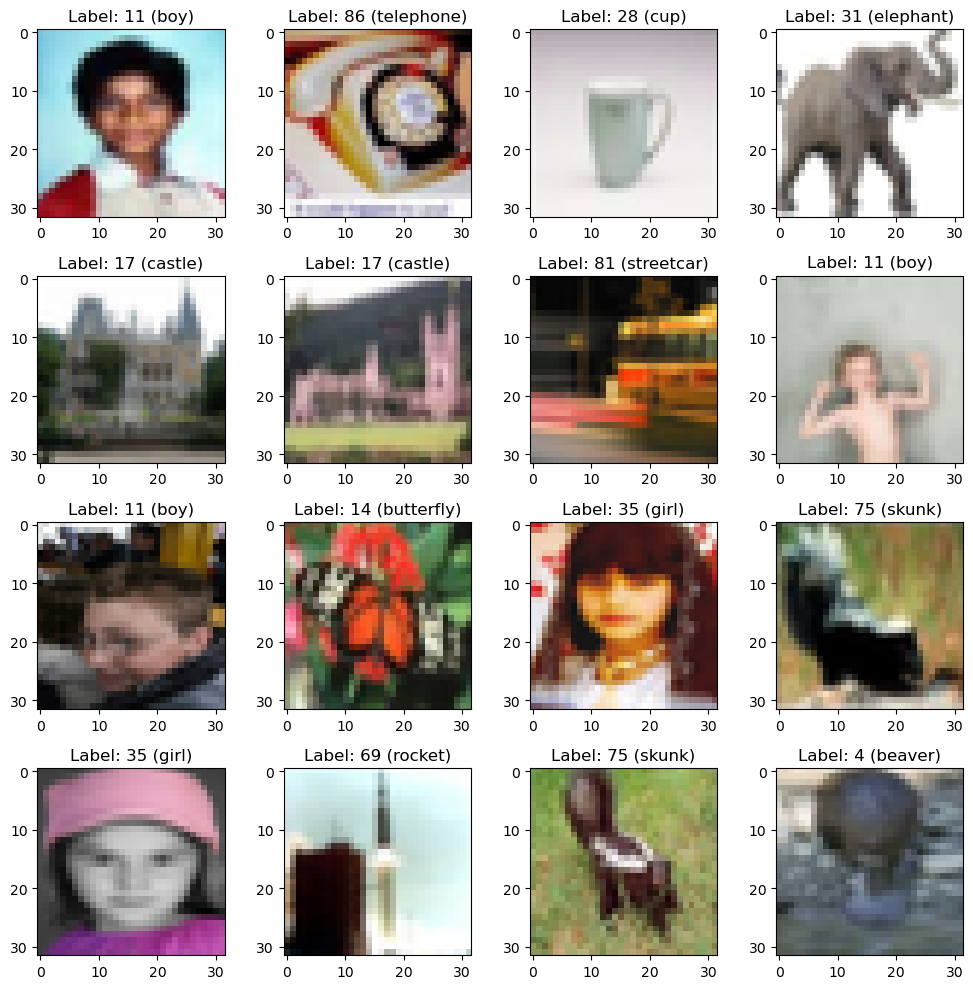

In [ ]:
# Display sample images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    image = train_images[i]
    label = train_labels[i]
    label_class = cifar100_train.classes[label]

    ax.imshow(image)
    ax.set_title(f"Label: {label} ({label_class})")

plt.tight_layout()
plt.show()

### Image Resizing

In [ ]:
def resize_images(images, new_size):
    resized_images = []

    for image in images:
        resized_image = cv2.resize(image, new_size)
        resized_images.append(resized_image)

    return resized_images

In [ ]:
image_size = 160

train_images = resize_images(train_images, (image_size, image_size))
test_images = resize_images(test_images, (image_size, image_size))

In [ ]:
image, label = train_images[0], train_labels[0]
image, label

(array([[[124, 194, 221],
         [124, 194, 221],
         [124, 194, 221],
         ...,
         [136, 213, 230],
         [136, 213, 230],
         [136, 213, 230]],
 
        [[124, 194, 221],
         [124, 194, 221],
         [124, 194, 221],
         ...,
         [136, 213, 230],
         [136, 213, 230],
         [136, 213, 230]],
 
        [[124, 194, 221],
         [124, 194, 221],
         [124, 194, 221],
         ...,
         [136, 213, 230],
         [136, 213, 230],
         [136, 213, 230]],
 
        ...,
 
        [[147,  12,  25],
         [147,  12,  25],
         [147,  12,  25],
         ...,
         [243, 230, 231],
         [243, 230, 231],
         [243, 230, 231]],
 
        [[147,  12,  25],
         [147,  12,  25],
         [147,  12,  25],
         ...,
         [243, 230, 231],
         [243, 230, 231],
         [243, 230, 231]],
 
        [[147,  12,  25],
         [147,  12,  25],
         [147,  12,  25],
         ...,
         [243, 230, 231],
  

In [ ]:
image.shape

(160, 160, 3)

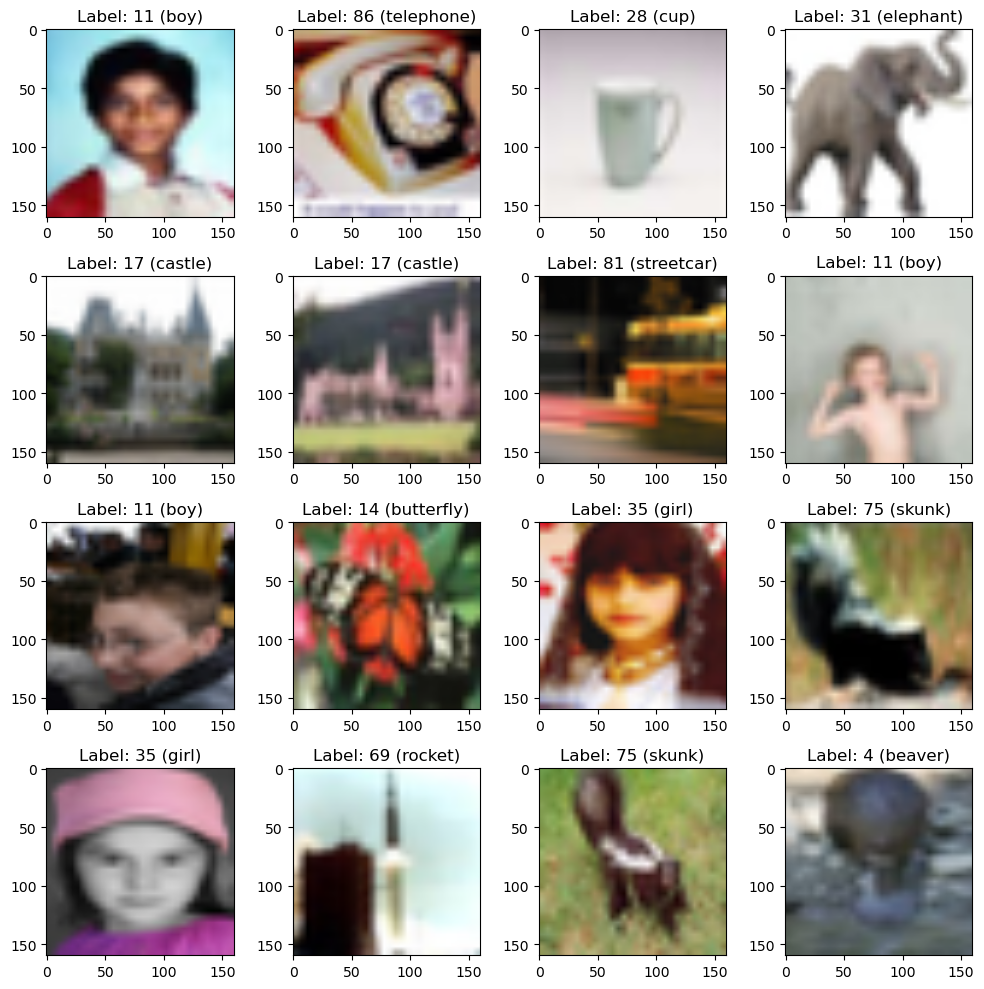

In [ ]:
# Display sample images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    image = train_images[i]
    label = train_labels[i]
    label_class = cifar100_train.classes[label]

    ax.imshow(image, cmap="gray")
    ax.set_title(f"Label: {label} ({label_class})")

plt.tight_layout()
plt.show()

### Color Space Conversion

In [ ]:
def convert_grayscale(images):
    gray_images = []

    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray_images.append((gray_image))

    return gray_images

In [ ]:
train_images = convert_grayscale(train_images)
test_images = convert_grayscale(test_images)

In [ ]:
image = train_images[0]
image

array([[176, 176, 176, ..., 192, 192, 192],
       [176, 176, 176, ..., 192, 192, 192],
       [176, 176, 176, ..., 192, 192, 192],
       ...,
       [ 54,  54,  54, ..., 234, 234, 234],
       [ 54,  54,  54, ..., 234, 234, 234],
       [ 54,  54,  54, ..., 234, 234, 234]], dtype=uint8)

In [ ]:
image.shape

(160, 160)

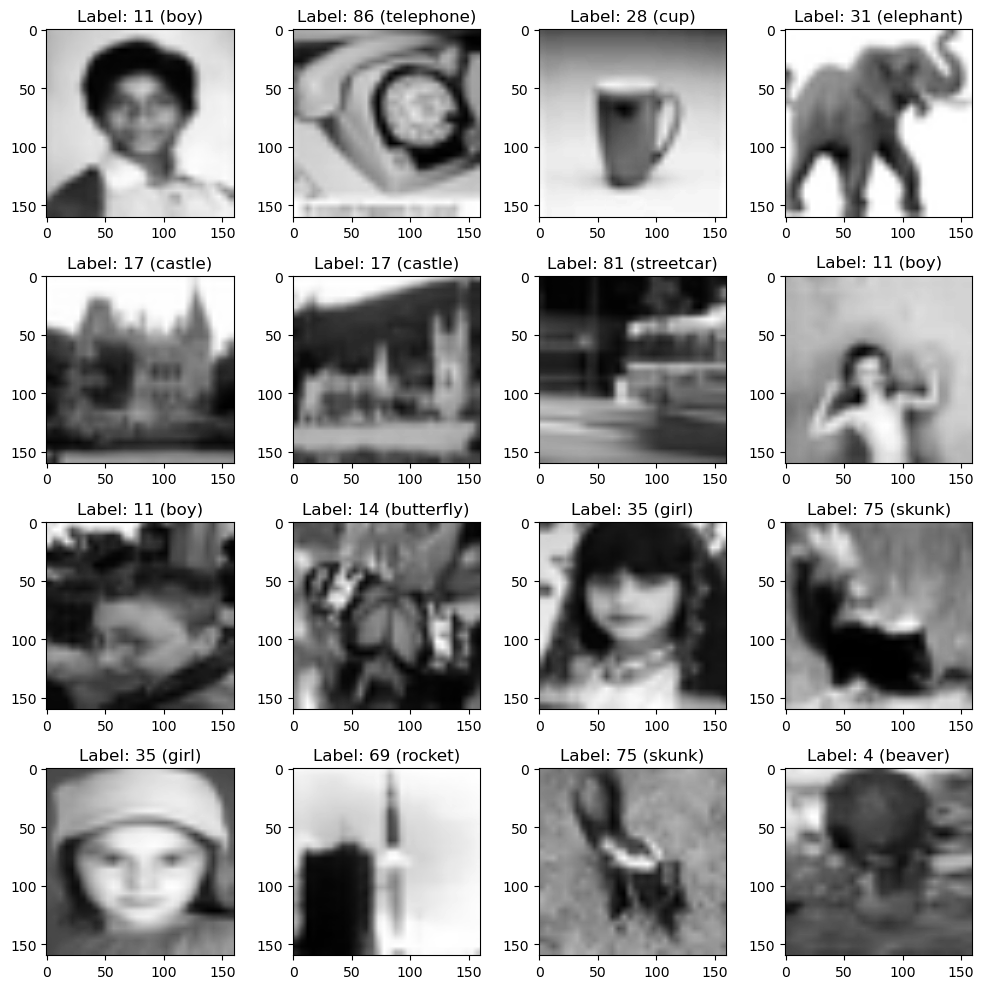

In [ ]:
# Display sample images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    image = train_images[i]
    label = train_labels[i]
    label_class = cifar100_train.classes[label]

    ax.imshow(image, cmap="gray")
    ax.set_title(f"Label: {label} ({label_class})")

plt.tight_layout()
plt.show()

### Contrast Enhancement

In [ ]:
def equalize_image(dataset):
    equalized_images = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    for image in dataset:
        equalized_image = clahe.apply(image)
        equalized_images.append(equalized_image)

    return equalized_images

In [ ]:
train_images = equalize_image(train_images)
test_images = equalize_image(test_images)

In [ ]:
image = train_images[0]
image

array([[154, 154, 154, ..., 166, 166, 166],
       [154, 154, 154, ..., 166, 166, 166],
       [154, 154, 154, ..., 166, 166, 166],
       ...,
       [ 58,  58,  58, ..., 231, 231, 231],
       [ 58,  58,  58, ..., 231, 231, 231],
       [ 58,  58,  58, ..., 231, 231, 231]], dtype=uint8)

In [ ]:
image.shape

(160, 160)

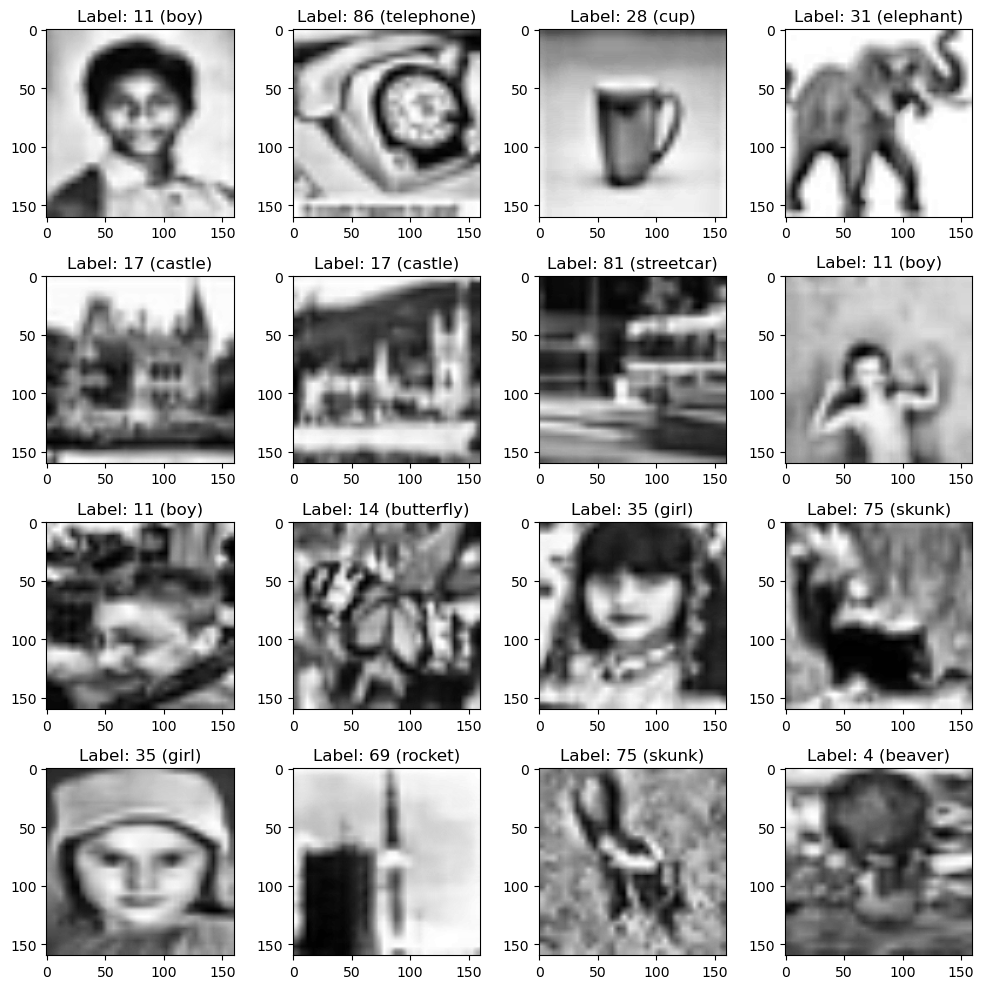

In [ ]:
# Display sample images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    image = train_images[i]
    label = train_labels[i]
    label_class = cifar100_train.classes[label]

    ax.imshow(image, cmap="gray")
    ax.set_title(f"Label: {label} ({label_class})")

plt.tight_layout()
plt.show()

## Hand-crafted features approach

### 2.1 BoW using SIFT

C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed 

              precision    recall  f1-score   support

           3       0.22      0.19      0.21       100
           4       0.19      0.09      0.12       100
          11       0.26      0.08      0.12       100
          13       0.29      0.29      0.29       100
          14       0.16      0.14      0.15       100
          17       0.23      0.27      0.25       100
          28       0.27      0.28      0.27       100
          31       0.08      0.06      0.07       100
          35       0.17      0.09      0.12       100
          54       0.31      0.51      0.39       100
          69       0.37      0.62      0.46       100
          75       0.28      0.27      0.28       100
          81       0.24      0.26      0.25       100
          86       0.36      0.52      0.42       100
          94       0.37      0.42      0.39       100

    accuracy                           0.27      1500
   macro avg       0.25      0.27      0.25      1500
weighted avg       0.25   

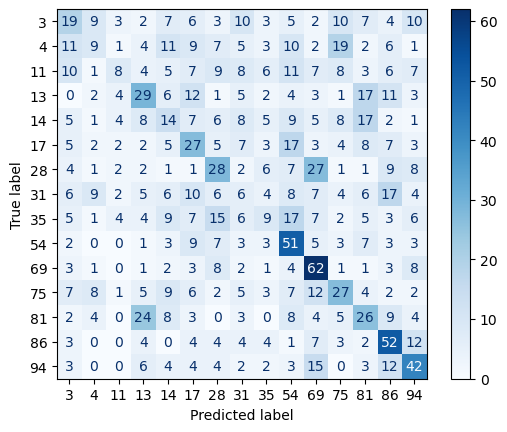

In [ ]:
random.seed(42)

def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

def build_visual_dictionary(images):
    descriptors_list = []
    for image in images:
        _, descriptors = extract_sift_features(image)
        if descriptors is not None:
            descriptors_list.extend(descriptors)
    descriptors_list = np.array(descriptors_list)
    kmeans.fit(descriptors_list)
    return kmeans.cluster_centers_

def extract_bow_feature(images, visual_dictionary):
    bow_features = []
    for image in images:
        _, descriptors = extract_sift_features(image)
        if descriptors is not None:
            bow_feature = np.zeros(len(visual_dictionary))
            predictions = kmeans.predict(descriptors)
            for prediction in predictions:
                bow_feature[prediction] += 1
            bow_features.append(bow_feature)
    return np.array(bow_features)

k = 200
kmeans = KMeans(n_clusters=k, random_state=42)

# Build visual dictionary
visual_dictionary_train = build_visual_dictionary(train_images)
visual_dictionary_test = build_visual_dictionary(test_images)

# Extract Bag-of-Words features
bow_features_train = extract_bow_feature(train_images, visual_dictionary_train)
bow_features_test = extract_bow_feature(test_images, visual_dictionary_test)

# Train SVM classifier
svm = LinearSVC()
svm.fit(bow_features_train, train_labels)

# Make predictions
predictions = svm.predict(bow_features_test)

# Print classification report
print(classification_report(test_labels, predictions))

# Display confustion matrix
ConfusionMatrixDisplay.from_estimator(
    svm,
    bow_features_test,
    test_labels,
    cmap=plt.cm.Blues,
)

plt.show()

### 2.2 BoW using ORB

C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed 

              precision    recall  f1-score   support

           3       0.26      0.18      0.21       100
           4       0.06      0.03      0.04       100
          11       0.13      0.08      0.10       100
          13       0.12      0.09      0.10       100
          14       0.12      0.15      0.14       100
          17       0.17      0.18      0.17       100
          28       0.22      0.19      0.20       100
          31       0.18      0.12      0.14       100
          35       0.13      0.09      0.11       100
          54       0.15      0.17      0.16       100
          69       0.28      0.32      0.30       100
          75       0.11      0.12      0.11       100
          81       0.15      0.23      0.18       100
          86       0.19      0.36      0.24       100
          94       0.31      0.31      0.31       100

    accuracy                           0.17      1500
   macro avg       0.17      0.17      0.17      1500
weighted avg       0.17   

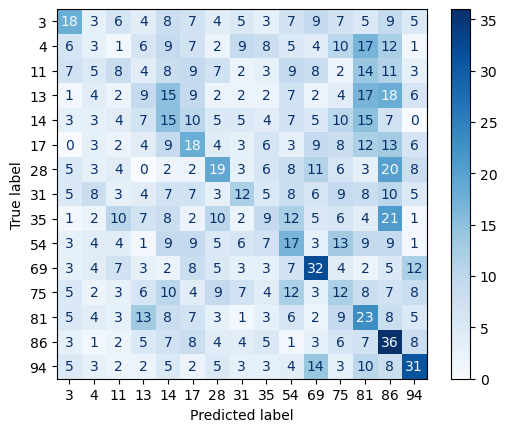

In [ ]:
random.seed(42)

def extract_orb_features(image):
    orb = cv2.ORB_create(nfeatures = 50, scaleFactor = 1.5, nlevels = 5, edgeThreshold = 5)
    keypoints, descriptors = orb.detectAndCompute(image, None)
    return keypoints, descriptors

def build_visual_dictionary(images):
    descriptors_list = []
    for image in images:
        _, descriptors = extract_orb_features(image)
        if descriptors is not None:
            descriptors_list.extend(descriptors)
    descriptors_list = np.array(descriptors_list)
    kmeans.fit(descriptors_list)
    return kmeans.cluster_centers_

def extract_bow_feature(images, visual_dictionary):
    bow_features = []
    for image in images:
        _, descriptors = extract_orb_features(image)
        if descriptors is not None:
            bow_feature = np.zeros(len(visual_dictionary))
            predictions = kmeans.predict(descriptors)
            for prediction in predictions:
                bow_feature[prediction] += 1
            bow_features.append(bow_feature)
    return np.array(bow_features)

k = 200
kmeans = KMeans(n_clusters=k, random_state=42)

# Build visual dictionary
visual_dictionary_train = build_visual_dictionary(train_images)
visual_dictionary_test = build_visual_dictionary(test_images)

# Extract Bag-of-Words features
bow_features_train = extract_bow_feature(train_images, visual_dictionary_train)
bow_features_test = extract_bow_feature(test_images, visual_dictionary_test)

# Train SVM classifier
svm = LinearSVC()
svm.fit(bow_features_train, train_labels)

# Make predictions
predictions = svm.predict(bow_features_test)

# Print classification report
print(classification_report(test_labels, predictions))

# Display confustion matrix
ConfusionMatrixDisplay.from_estimator(
    svm,
    bow_features_test,
    test_labels,
    cmap=plt.cm.Blues,
)

plt.show()

### 2.3 Fisher Vectors using K-mode GMM & SIFT

C:\Users\KaungHtetHein\anaconda3\envs\my_python_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           3       0.17      0.20      0.19       100
           4       0.17      0.20      0.18       100
          11       0.23      0.20      0.22       100
          13       0.29      0.37      0.33       100
          14       0.26      0.23      0.24       100
          17       0.22      0.23      0.23       100
          28       0.29      0.20      0.24       100
          31       0.21      0.23      0.22       100
          35       0.15      0.14      0.14       100
          54       0.31      0.38      0.34       100
          69       0.45      0.30      0.36       100
          75       0.30      0.32      0.31       100
          81       0.26      0.29      0.27       100
          86       0.39      0.36      0.37       100
          94       0.48      0.42      0.45       100

    accuracy                           0.27      1500
   macro avg       0.28      0.27      0.27      1500
weighted avg       0.28   

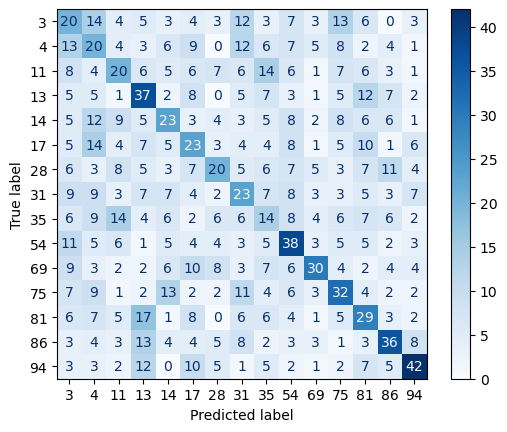

In [ ]:
random.seed(42)

# Assuming train_images and test_images are arrays/lists of images
train_descriptors = []
test_descriptors = []

# Extract SIFT features for training images
for image in train_images:
    keypoints, descriptors = extract_sift_features(image)
    train_descriptors.append(descriptors)

# Extract SIFT features for test images
for image in test_images:
    keypoints, descriptors = extract_sift_features(image)
    test_descriptors.append(descriptors)

# Train a K-mode GMM
k = 16
gmm = learn_gmm(train_descriptors, n_modes=k)

# Compute the Fisher vectors
training_fvs = np.array([
    fisher_vector(descriptor_mat, gmm)
    for descriptor_mat in train_descriptors
])

testing_fvs = np.array([
    fisher_vector(descriptor_mat, gmm)
    for descriptor_mat in test_descriptors
])

# Train SVM classifier
svm = LinearSVC()
svm.fit(training_fvs, train_labels)

# Make predictions
predictions = svm.predict(testing_fvs)

# Print classification report
print(classification_report(test_labels, predictions))

# Display confustion matrix
ConfusionMatrixDisplay.from_estimator(
    svm,
    testing_fvs,
    test_labels,
    cmap=plt.cm.Blues,
)

plt.show()